### Deliverable 1: Preprocessing the Data for a Neural Network

In [200]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [201]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)

In [202]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [203]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

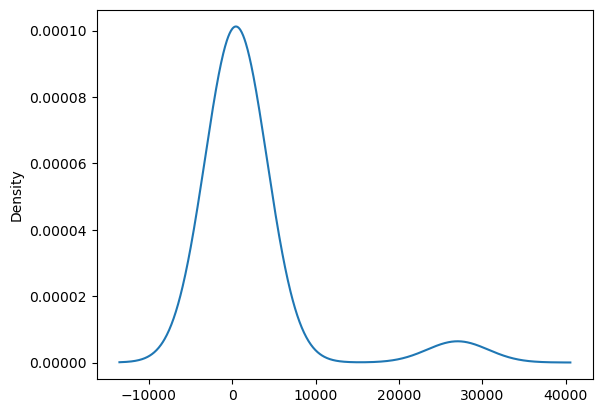

In [204]:
# Visualize the value counts of APPLICATION_TYPE
application_df.APPLICATION_TYPE.value_counts().plot.density()

# show the plot
plt.show()

In [205]:
# Determine which values to replace if counts are less than ...?
replace_applications = list(application_counts[application_counts < 200].index)

# Replace in dataframe
for app in replace_applications:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [206]:
# Look at CLASSIFICATION value counts for binning

classification_count = application_df.CLASSIFICATION.value_counts()
classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

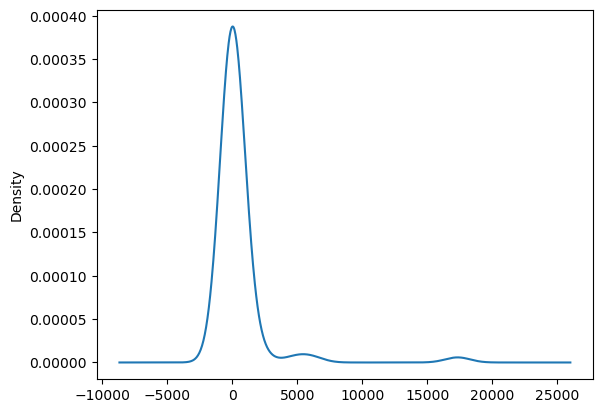

In [207]:
# Visualize the value counts of CLASSIFICATION
application_df.CLASSIFICATION.value_counts().plot.density()

# show the plot
plt.show()

In [208]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_count[classification_count < 1000].index)
# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [209]:
# Look at CLASSIFICATION value counts for binning

INCOME_AMT_count = application_df.INCOME_AMT.value_counts()
INCOME_AMT_count





0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

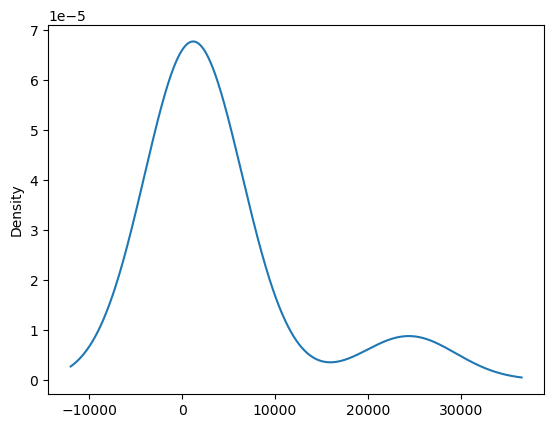

In [210]:
# Visualize the value counts of CLASSIFICATION
application_df.INCOME_AMT.value_counts().plot.density()

# show the plot
plt.show()

In [211]:
# Determine which values to replace if counts are less than ..?
replace_INCOME_AMT = list(INCOME_AMT_count[INCOME_AMT_count > 5000].index)
# Replace in dataframe
for inc in replace_INCOME_AMT:
    application_df.INCOME_AMT = application_df.INCOME_AMT.replace(inc,"Other")
    
# Check to make sure binning was successful
application_df.INCOME_AMT.value_counts()

Other            24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [212]:
# Look at CLASSIFICATION value counts for binning

SPECIAL_CONSIDERATIONS_count = application_df.SPECIAL_CONSIDERATIONS.value_counts()
SPECIAL_CONSIDERATIONS_count



N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

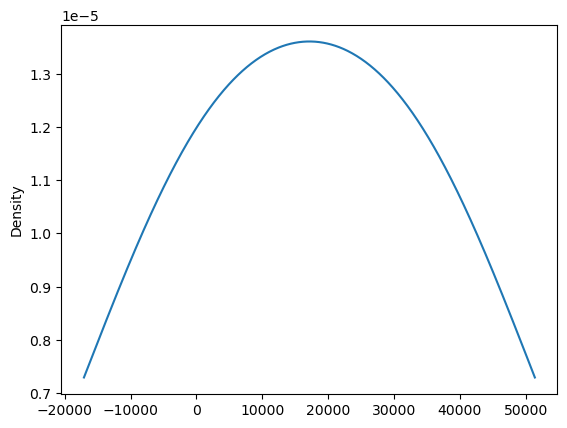

In [213]:
# Visualize the value counts of CLASSIFICATION
application_df.SPECIAL_CONSIDERATIONS.value_counts().plot.density()

# show the plot
plt.show()

In [214]:
# Determine which values to replace if counts are less than ..?
replace_SPECIAL_CONSIDERATIONS = list(SPECIAL_CONSIDERATIONS_count[SPECIAL_CONSIDERATIONS_count <100].index)
# Replace in dataframe
for sc in replace_SPECIAL_CONSIDERATIONS:
    application_df.SPECIAL_CONSIDERATIONS = application_df.SPECIAL_CONSIDERATIONS.replace(sc,"Y")
    
# Check to make sure binning was successful
application_df.SPECIAL_CONSIDERATIONS.value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [215]:
# Generate our categorical variable lists
cat_list = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
cat_list

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [218]:
# Create a OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc2 = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
Application_encode_df = pd.DataFrame(enc2.fit_transform(application_df[cat_list]))

# Add the encoded variable names to the dataframe
Application_encode_df.columns = enc2.get_feature_names_out(cat_list)
Application_encode_df.head()

C:\Users\razza\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [219]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(Application_encode_df,left_index=True,right_index=True).drop(cat_list,1)
application_df.head()

C:\Users\razza\AppData\Local\Temp\ipykernel_19732\3019309212.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  application_df = application_df.merge(Application_encode_df,left_index=True,right_index=True).drop(cat_list,1)


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [250]:
# Split our preprocessed data into our features and target arrays
X = pd.DataFrame(application_df, columns=['APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_1-9999',
       'INCOME_AMT_10000-24999', 'INCOME_AMT_100000-499999',
       'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M', 'INCOME_AMT_25000-99999',
       'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M', 'INCOME_AMT_Other',
       'SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y'])
y = application_df["IS_SUCCESSFUL"].values.reshape(-1, 1)
# Split the preprocessed data into a training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [251]:
X.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [252]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [308]:
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=41))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="relu", input_dim=41))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_135 (Dense)           (None, 80)                3360      
                                                                 
 dense_136 (Dense)           (None, 30)                2430      
                                                                 
 dense_137 (Dense)           (None, 1)                 31        
                                                                 
Total params: 5,821
Trainable params: 5,821
Non-trainable params: 0
_________________________________________________________________


In [309]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [266]:
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5700 - accuracy: 0.7206
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5542 - accuracy: 0.7308
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5516 - accuracy: 0.7316
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5497 - accuracy: 0.7304
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5490 - accuracy: 0.7317
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5484 - accuracy: 0.7327
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5474 - accuracy: 0.7341
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5467 - accuracy: 0.7335
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5463 - accuracy: 0.7357
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5457 - accura

804/804 [==============================] - 2s 2ms/step - loss: 0.5363 - accuracy: 0.7397
Epoch 82/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5366 - accuracy: 0.7408
Epoch 83/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5363 - accuracy: 0.7409
Epoch 84/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5363 - accuracy: 0.7401
Epoch 85/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5365 - accuracy: 0.7406
Epoch 86/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5363 - accuracy: 0.7412
Epoch 87/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5363 - accuracy: 0.7409
Epoch 88/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5362 - accuracy: 0.7415
Epoch 89/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5360 - accuracy: 0.7407
Epoch 90/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5365 - accuracy: 

In [256]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5820 - accuracy: 0.7138
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5576 - accuracy: 0.7293
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5540 - accuracy: 0.7307
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5524 - accuracy: 0.7313
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5511 - accuracy: 0.7325
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5502 - accuracy: 0.7317
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5500 - accuracy: 0.7324
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5493 - accuracy: 0.7318
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5485 - accuracy: 0.7329
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5484 - accura

804/804 [==============================] - 2s 2ms/step - loss: 0.5413 - accuracy: 0.7374
Epoch 82/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5414 - accuracy: 0.7365
Epoch 83/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5408 - accuracy: 0.7388
Epoch 84/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5411 - accuracy: 0.7389
Epoch 85/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5408 - accuracy: 0.7384
Epoch 86/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5412 - accuracy: 0.7378
Epoch 87/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5411 - accuracy: 0.7386
Epoch 88/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5413 - accuracy: 0.7384
Epoch 89/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5410 - accuracy: 0.7379
Epoch 90/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5408 - accuracy: 

In [310]:
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5692 - accuracy: 0.7229
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5550 - accuracy: 0.7306
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5528 - accuracy: 0.7316
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5507 - accuracy: 0.7325
Epoch 5/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5496 - accuracy: 0.7323
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5479 - accuracy: 0.7330
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5483 - accuracy: 0.7343
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5472 - accuracy: 0.7339
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5465 - accuracy: 0.7339
Epoch 10/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5463 - accura

804/804 [==============================] - 2s 2ms/step - loss: 0.5364 - accuracy: 0.7408
Epoch 82/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5360 - accuracy: 0.7410
Epoch 83/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5364 - accuracy: 0.7404
Epoch 84/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5365 - accuracy: 0.7409
Epoch 85/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5364 - accuracy: 0.7408
Epoch 86/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5362 - accuracy: 0.7411
Epoch 87/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5365 - accuracy: 0.7403
Epoch 88/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5362 - accuracy: 0.7413
Epoch 89/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5364 - accuracy: 0.7404
Epoch 90/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5363 - accuracy: 

In [311]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5577 - accuracy: 0.7263 - 576ms/epoch - 2ms/step
Loss: 0.5577229261398315, Accuracy: 0.7262973785400391


<Axes: >

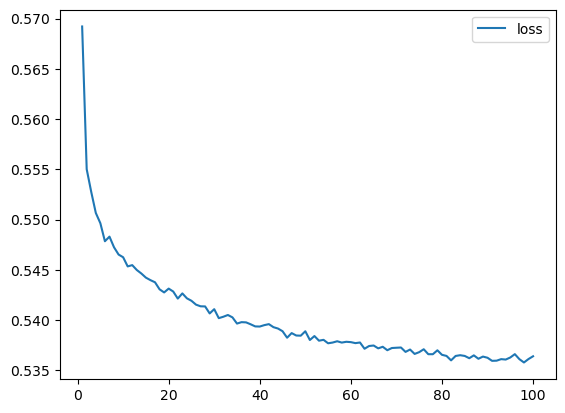

In [312]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<Axes: >

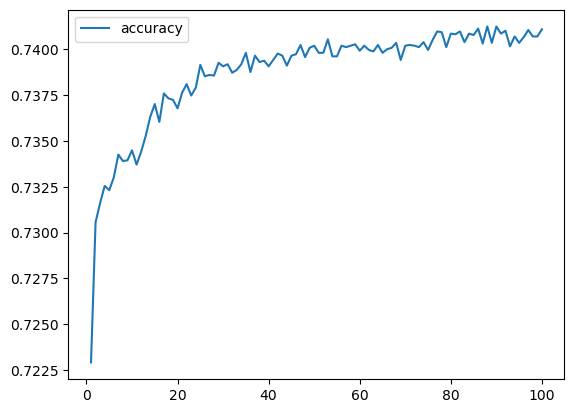

In [313]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [318]:
# Export our model to HDF5 file
nn.save("trained_model.h5")